# 📊 Exploratory Analysis & Mapping

## Step 1: Load cleaned data

In [1]:
import pandas as pd

# Load the cleaned data
df = pd.read_csv("cleaned_gbif_data.csv")

# Show the first few rows
df.head()


,scientificName,eventDate,decimalLatitude,decimalLongitude,county,stateProvince,individualCount,basisOfRecord,occurrenceStatus
0,"Coleura afra (Peters, 1852)",2012-09-23,-4.61532,39.35317,Kwale,Kenyan Coast,1,PRESERVED_SPECIMEN,PRESENT
1,"Coleura afra (Peters, 1852)",2012-09-30,-4.08171,39.48295,Kwale,Kenyan Coast,1,PRESERVED_SPECIMEN,PRESENT
2,"Miniopterus minor Peters, 1867",2012-09-25,-4.61542,39.35286,Kwale,Kenyan Coast,1,PRESERVED_SPECIMEN,PRESENT
3,"Rousettus aegyptiacus (E.Geoffroy, 1810)",2012-09-24,-3.29986,39.99509,Kilifi,Kenyan Coast,1,PRESERVED_SPECIMEN,PRESENT
4,"Epomophorus wahlbergi (Sundevall, 1846)",2012-09-23,-3.29986,39.99509,Kilifi,Kenyan Coast,1,PRESERVED_SPECIMEN,PRESENT


## Step 2: Basic statistics and trends

In [2]:
# Number of records
print(f"Total records: {len(df)}")

# Unique species
print("Top 5 most common species:")
print(df['scientificName'].value_counts().head())

# Records by county
print("\nRecords by county:")
print(df['county'].value_counts())


Total records: 200
Top 5 most common species:
scientificName
Coleura afra (Peters, 1852)                 11
Epomophorus wahlbergi (Sundevall, 1846)     10
Rousettus aegyptiacus (E.Geoffroy, 1810)     8
Taphozous hildegardeae Thomas, 1909          8
Hipposideros vittatus (Peters, 1852)         8
Name: count, dtype: int64

Records by county:
county
Kwale     109
Kilifi     63
Taita      28
Name: count, dtype: int64


## Step 3: Time Trends

<Axes: title={'center': 'Sightings by Month'}, xlabel='month'>

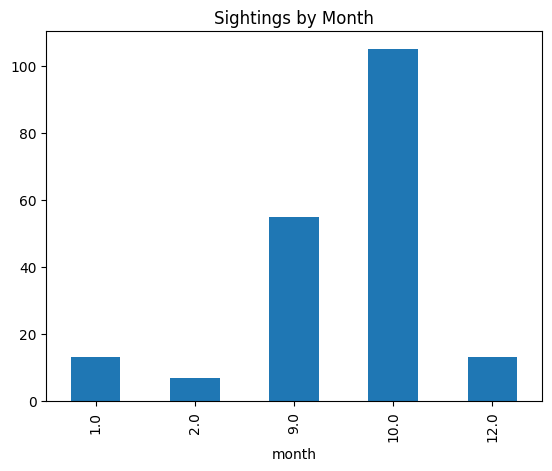

In [3]:
# Convert eventDate to datetime
df['eventDate'] = pd.to_datetime(df['eventDate'], errors='coerce')

# Plot sightings by month
df['month'] = df['eventDate'].dt.month
df['month'].value_counts().sort_index().plot(kind='bar', title='Sightings by Month')


## Step 4: Interactive mapping with Folium or Kepler.gl

In [5]:
import folium
from folium.plugins import MarkerCluster

# Initialize map centered in Taita-Taveta region
m = folium.Map(location=[-3.3, 38.5], zoom_start=7)

# Add sightings as markers
marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker(
        location=[row['decimalLatitude'], row['decimalLongitude']],
        popup=row['scientificName']
    ).add_to(marker_cluster)

m
